In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import corner
import asteroseismology as se
rootpath = '/Volumes/Data/Onedrive/Work/numax-sc-metallicity/'
work_dir = rootpath+'surface/'
import scipy
import h5py
import glob
from astropy.io import ascii
from astropy.table import Table

# Numerical scheme in GYRE

In [70]:
modes = pd.read_excel(rootpath+'sample/modes.xlsx')
idx = modes['KIC']==0
modes = modes.loc[idx]

for im, m in modes.iterrows():
    if not (m['l']==0): continue
    idx = np.where((modes['l']==2) & (np.abs(modes['fc']-m['fc']) < 0.1*135.1) )[0] 
    if len(idx)==0: continue
    fc_l2 = modes.iloc[idx[0]]['fc'] 
    
    idx = np.where((modes['l']==1) & (np.abs(modes['fc']-(m['fc']+0.5*135.1)) < 0.2*135.1) )[0] 
    if len(idx)==0: continue
    fc_l1_2 = modes.iloc[idx[0]]['fc'] 
    
    idx = np.where((modes['l']==1) & (np.abs(modes['fc']-(m['fc']-0.5*135.1)) < 0.2*135.1) )[0] 
    if len(idx)==0: continue
    fc_l1_1 = modes.iloc[idx[0]]['fc'] 
    
    Dnu = fc_l1_2-fc_l1_1
    
    modes.loc[im, 'r02'] = (m['fc'] - fc_l2)/Dnu

idx = modes['l']<=2
obs_freq, obs_r02 = np.array(modes.loc[idx, 'fc']), np.array(modes.loc[idx, 'r02'])
obs_efreq, obs_l = np.array(modes.loc[idx, 'e_fc']), np.array(modes.loc[idx, 'l'])
modes

,KIC,l,fc,e_fc,lw,e_lw,amp,e_amp,r02
8093,0,9,972.613,0.002,NaN,NaN,NaN,NaN,NaN
8094,0,0,1263.162,0.012,NaN,NaN,NaN,NaN,NaN
8095,0,0,1407.481,0.012,NaN,NaN,NaN,NaN,0.089389
8096,0,0,1548.333,0.007,NaN,NaN,NaN,NaN,0.089173
8097,0,0,1686.597,0.011,NaN,NaN,NaN,NaN,0.088335
...,...,...,...,...,...,...,...,...,...
8167,0,3,3217.683,0.028,NaN,NaN,NaN,NaN,NaN
8168,0,3,3353.335,0.041,NaN,NaN,NaN,NaN,NaN
8169,0,3,3489.409,0.053,NaN,NaN,NaN,NaN,NaN
8170,0,3,3626.078,0.075,NaN,NaN,NaN,NaN,NaN


In [149]:
cases = ['solar_a09', 'solar_a09_ov', 'solar_gs98', 'solar_gs98_ov']
samples = ['0061', '0209', '0088', '0103']

Processing : /Volumes/Data/Onedrive/Work/numax-sc-metallicity/hpc/solar_gs98/outputs/sample0088_best_2th_collo.sum
Processing : /Volumes/Data/Onedrive/Work/numax-sc-metallicity/hpc/solar_gs98/outputs/sample0088_best_4th_collo.sum
Processing : /Volumes/Data/Onedrive/Work/numax-sc-metallicity/hpc/solar_gs98/outputs/sample0088_best_6th_collo.sum
Processing : /Volumes/Data/Onedrive/Work/numax-sc-metallicity/hpc/solar_gs98/outputs/sample0088_best_2th_magnus.sum
Processing : /Volumes/Data/Onedrive/Work/numax-sc-metallicity/hpc/solar_gs98/outputs/sample0088_best_4th_magnus.sum
Processing : /Volumes/Data/Onedrive/Work/numax-sc-metallicity/hpc/solar_gs98/outputs/sample0088_best_6th_magnus.sum


Text(0.5, 0, 'freq [muHz]')

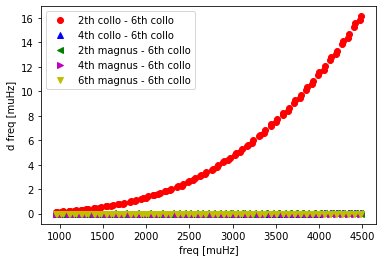

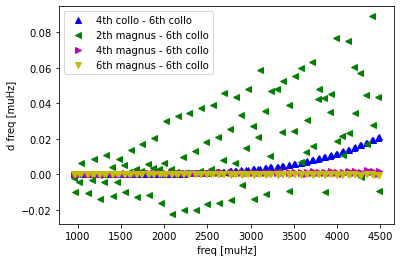

In [211]:
icase = 2
# read from gyre
s = se.sums(rootpath+'hpc/{:s}/outputs/sample{:s}_best_2th_collo.sum'.format(cases[icase], samples[icase]))
modes1 = pd.DataFrame(s.sums)

s = se.sums(rootpath+'hpc/{:s}/outputs/sample{:s}_best_4th_collo.sum'.format(cases[icase], samples[icase]))
modes2 = pd.DataFrame(s.sums)

s = se.sums(rootpath+'hpc/{:s}/outputs/sample{:s}_best_6th_collo.sum'.format(cases[icase], samples[icase]))
modes3 = pd.DataFrame(s.sums)

s = se.sums(rootpath+'hpc/{:s}/outputs/sample{:s}_best_2th_magnus.sum'.format(cases[icase], samples[icase]))
modes4 = pd.DataFrame(s.sums)

s = se.sums(rootpath+'hpc/{:s}/outputs/sample{:s}_best_4th_magnus.sum'.format(cases[icase], samples[icase]))
modes5 = pd.DataFrame(s.sums)

s = se.sums(rootpath+'hpc/{:s}/outputs/sample{:s}_best_6th_magnus.sum'.format(cases[icase], samples[icase]))
modes6 = pd.DataFrame(s.sums)

plt.figure()
plt.plot(modes2['Refreq'], modes1['Refreq']-modes3['Refreq'], 'ro', label='2th collo - 6th collo')
plt.plot(modes2['Refreq'], modes2['Refreq']-modes3['Refreq'], 'b^', label='4th collo - 6th collo')
plt.plot(modes2['Refreq'], modes4['Refreq']-modes3['Refreq'], 'g<', label='2th magnus - 6th collo')
plt.plot(modes2['Refreq'], modes5['Refreq']-modes3['Refreq'], 'm>', label='4th magnus - 6th collo')
plt.plot(modes2['Refreq'], modes6['Refreq']-modes3['Refreq'], 'yv', label='6th magnus - 6th collo')
plt.legend()
plt.ylabel('d freq [muHz]')
plt.xlabel('freq [muHz]')


plt.figure()
# plt.plot(modes2['Refreq'], modes1['Refreq']-modes3['Refreq'], 'ro', label='2th collo - 6th collo')
plt.plot(modes2['Refreq'], modes2['Refreq']-modes3['Refreq'], 'b^', label='4th collo - 6th collo')
plt.plot(modes2['Refreq'], modes4['Refreq']-modes3['Refreq'], 'g<', label='2th magnus - 6th collo')
plt.plot(modes2['Refreq'], modes5['Refreq']-modes3['Refreq'], 'm>', label='4th magnus - 6th collo')
plt.plot(modes2['Refreq'], modes6['Refreq']-modes3['Refreq'], 'yv', label='6th magnus - 6th collo')
plt.legend()
plt.ylabel('d freq [muHz]')
plt.xlabel('freq [muHz]')

Processing : /Volumes/Data/Onedrive/Work/numax-sc-metallicity/hpc/solar_a09_ov/outputs/sample0060_2th_colloc.fgong.sum
Processing : /Volumes/Data/Onedrive/Work/numax-sc-metallicity/hpc/solar_a09_ov/outputs/sample0060_4th_colloc.fgong.sum
Processing : /Volumes/Data/Onedrive/Work/numax-sc-metallicity/hpc/solar_a09_ov/outputs/sample0060_6th_colloc.fgong.sum
Processing : /Volumes/Data/Onedrive/Work/numax-sc-metallicity/hpc/solar_a09_ov/outputs/sample0060_2th_magnus.fgong.sum
Processing : /Volumes/Data/Onedrive/Work/numax-sc-metallicity/hpc/solar_a09_ov/outputs/sample0060_4th_magnus.fgong.sum
Processing : /Volumes/Data/Onedrive/Work/numax-sc-metallicity/hpc/solar_a09_ov/outputs/sample0060_6th_magnus.fgong.sum


Text(0.5, 0, 'freq [muHz]')

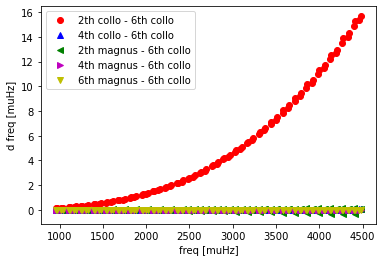

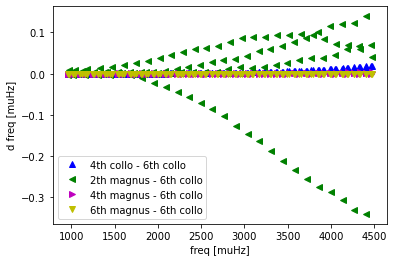

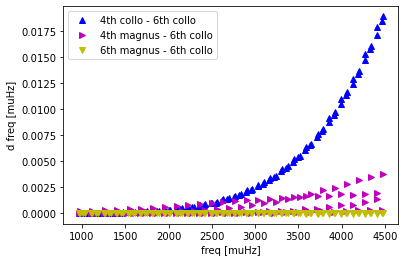

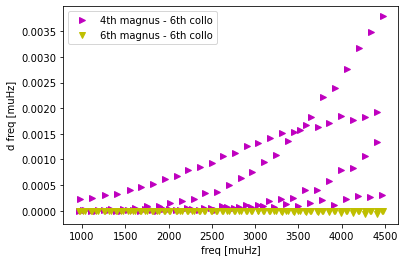

In [234]:
icase = 2
# read from gyre
s = se.sums(rootpath+'hpc/solar_a09_ov/outputs/sample0060_2th_colloc.fgong.sum')
modes1 = pd.DataFrame(s.sums)

s = se.sums(rootpath+'hpc/solar_a09_ov/outputs/sample0060_4th_colloc.fgong.sum')
modes2 = pd.DataFrame(s.sums)

s = se.sums(rootpath+'hpc/solar_a09_ov/outputs/sample0060_6th_colloc.fgong.sum')
modes3 = pd.DataFrame(s.sums)

s = se.sums(rootpath+'hpc/solar_a09_ov/outputs/sample0060_2th_magnus.fgong.sum')
modes4 = pd.DataFrame(s.sums)

s = se.sums(rootpath+'hpc/solar_a09_ov/outputs/sample0060_4th_magnus.fgong.sum')
modes5 = pd.DataFrame(s.sums)

s = se.sums(rootpath+'hpc/solar_a09_ov/outputs/sample0060_6th_magnus.fgong.sum')
modes6 = pd.DataFrame(s.sums)

plt.figure()
plt.plot(modes2['Refreq'], modes1['Refreq']-modes3['Refreq'], 'ro', label='2th collo - 6th collo')
plt.plot(modes2['Refreq'], modes2['Refreq']-modes3['Refreq'], 'b^', label='4th collo - 6th collo')
plt.plot(modes2['Refreq'], modes4['Refreq']-modes3['Refreq'], 'g<', label='2th magnus - 6th collo')
plt.plot(modes2['Refreq'], modes5['Refreq']-modes3['Refreq'], 'm>', label='4th magnus - 6th collo')
plt.plot(modes2['Refreq'], modes6['Refreq']-modes3['Refreq'], 'yv', label='6th magnus - 6th collo')
plt.legend()
plt.ylabel('d freq [muHz]')
plt.xlabel('freq [muHz]')


plt.figure()
# plt.plot(modes2['Refreq'], modes1['Refreq']-modes3['Refreq'], 'ro', label='2th collo - 6th collo')
plt.plot(modes2['Refreq'], modes2['Refreq']-modes3['Refreq'], 'b^', label='4th collo - 6th collo')
plt.plot(modes2['Refreq'], modes4['Refreq']-modes3['Refreq'], 'g<', label='2th magnus - 6th collo')
plt.plot(modes2['Refreq'], modes5['Refreq']-modes3['Refreq'], 'm>', label='4th magnus - 6th collo')
plt.plot(modes2['Refreq'], modes6['Refreq']-modes3['Refreq'], 'yv', label='6th magnus - 6th collo')
plt.legend()
plt.ylabel('d freq [muHz]')
plt.xlabel('freq [muHz]')

plt.figure()
# plt.plot(modes2['Refreq'], modes1['Refreq']-modes3['Refreq'], 'ro', label='2th collo - 6th collo')
plt.plot(modes2['Refreq'], modes2['Refreq']-modes3['Refreq'], 'b^', label='4th collo - 6th collo')
# plt.plot(modes2['Refreq'], modes4['Refreq']-modes3['Refreq'], 'g<', label='2th magnus - 6th collo')
plt.plot(modes2['Refreq'], modes5['Refreq']-modes3['Refreq'], 'm>', label='4th magnus - 6th collo')
plt.plot(modes2['Refreq'], modes6['Refreq']-modes3['Refreq'], 'yv', label='6th magnus - 6th collo')
plt.legend()
plt.ylabel('d freq [muHz]')
plt.xlabel('freq [muHz]')

plt.figure()
# plt.plot(modes2['Refreq'], modes1['Refreq']-modes3['Refreq'], 'ro', label='2th collo - 6th collo')
# plt.plot(modes2['Refreq'], modes2['Refreq']-modes3['Refreq'], 'b^', label='4th collo - 6th collo')
# plt.plot(modes2['Refreq'], modes4['Refreq']-modes3['Refreq'], 'g<', label='2th magnus - 6th collo')
plt.plot(modes2['Refreq'], modes5['Refreq']-modes3['Refreq'], 'm>', label='4th magnus - 6th collo')
plt.plot(modes2['Refreq'], modes6['Refreq']-modes3['Refreq'], 'yv', label='6th magnus - 6th collo')
plt.legend()
plt.ylabel('d freq [muHz]')
plt.xlabel('freq [muHz]')

Processing : /Volumes/Data/Onedrive/Work/numax-sc-metallicity/hpc/solar_gs98/outputs/sample0088_best_4th_magnus.sum
surface_a3: -1.966e-07
surface_a-1: -1.127e-09
chi_seis_unweighted: 0.05
Dnu (freq): 135.97
SC/muHz: -5.07
surface_a3: -1.956e-07
surface_a-1: -2.057e-09
chi_seis_unweighted: 0.05
Dnu (freq): 135.97
SC/muHz: -5.23


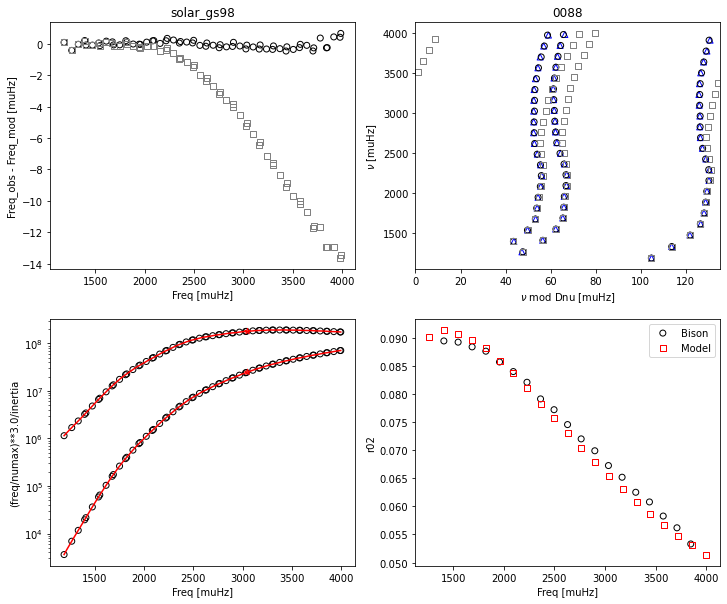

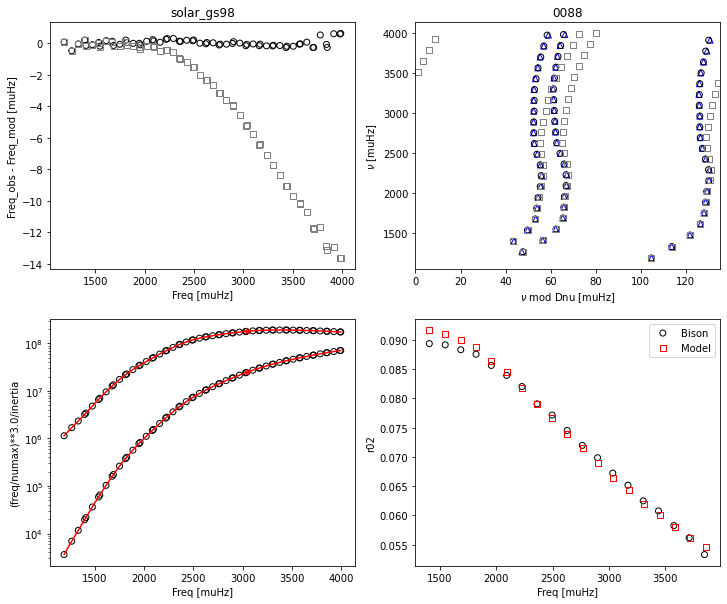

In [212]:
for icase in range(2,3):
    # read from gyre
    s = se.sums(rootpath+'hpc/{:s}/outputs/sample{:s}_best_4th_magnus.sum'.format(cases[icase], samples[icase]))
    modes1 = pd.DataFrame(s.sums)

    # read from mesa output
    s=pd.read_fwf(rootpath+'hpc/{:s}/outputs/sample_{:s}.data'.format(cases[icase], samples[icase]),
             skipfooter=54, infer_nrows=20)

    Refreq = np.array(np.concatenate([s.loc[0:21,'l0_freq'], 
                             s.loc[23:43,'l0_freq'], 
                             s.loc[45:64,'l0_freq'],
                             s.loc[66:81,'l0_freq']]), dtype=float)
    l = np.concatenate([np.zeros(22), np.zeros(21)+1, np.zeros(20)+2, np.zeros(16)+3])
    E_norm = 10.0**np.array(np.concatenate([s.loc[0:21,'log E'], 
                             s.loc[23:43,'log E'], 
                             s.loc[45:64,'log E'],
                             s.loc[66:81,'log E']]), dtype=float)
    modes2 = pd.DataFrame(np.array([Refreq, l, E_norm]).T, columns=['Refreq', 'l', 'E_norm'])
    
    mod_freqs = []
    mod_ls = []
    
    for modes in [modes1, modes2]:

        for im, m in modes.iterrows():
            if not (m['l']==0): continue
            idx = np.where((modes['l']==2) & (np.abs(modes['Refreq']-m['Refreq']) < 0.1*135.1) )[0] 
            if len(idx)==0: continue
            fc_l2 = modes.iloc[idx[0]]['Refreq'] 

            idx = np.where((modes['l']==1) & (np.abs(modes['Refreq']-(m['Refreq']+0.5*135.1)) < 0.2*135.1) )[0] 
            if len(idx)==0: continue
            fc_l1_2 = modes.iloc[idx[0]]['Refreq'] 

            idx = np.where((modes['l']==1) & (np.abs(modes['Refreq']-(m['Refreq']-0.5*135.1)) < 0.2*135.1) )[0] 
            if len(idx)==0: continue
            fc_l1_1 = modes.iloc[idx[0]]['Refreq'] 

            Dnu = fc_l1_2-fc_l1_1

            modes.loc[im, 'r02'] = (m['Refreq'] - fc_l2)/Dnu

        idx = modes['l']<=3
        mod_freq, mod_r02 = np.array(modes.loc[idx, 'Refreq']), np.array(modes.loc[idx, 'r02'])
        mod_l, mod_inertia = np.array(modes.loc[idx, 'l']), np.array(modes.loc[idx, 'E_norm'])


        mod_numax = 3050#data['numax_scaling'][i]
        mod_acfreq = 5000

        g = se.grid(None,[None],[None],'./',[None])
        _,_,_,mod_freq,mod_l,mod_inertia,mod_r02=g.assign_n(obs_freq, obs_efreq, obs_l, mod_freq, mod_l, mod_inertia, mod_r02)
        mod_freq_corr, surface_params = se.get_surface_correction(obs_freq, obs_l, 
                                                              mod_freq, mod_l, mod_inertia, mod_acfreq,
                                                              'cubic_inverse', True)
        mod_freqs.append(mod_freq)
        mod_ls.append(mod_l)
        
        chi2_seis = np.nanmean((mod_freq_corr-obs_freq)**2.0)
        print('surface_a3: {:0.3e}'.format(surface_params[1,0]))
        print('surface_a-1: {:0.3e}'.format(surface_params[0,0]))
        print('chi_seis_unweighted: {:0.2f}'.format(chi2_seis))
        # print('mass: {:0.2f}'.format(mass))
        # print('age: {:0.2f}'.format(age))
        # print('lum: {:0.2f}'.format(lum))
        # print('R: {:0.2f}'.format(radius))
        # print('Teff: {:0.2f}'.format(Teff))
        # print('feh: {:0.2f}'.format(feh))
        model_Dnu = se.get_model_Dnu(mod_freq, mod_l, 135.1, 3050)
        print('Dnu (freq): {:0.2f}'.format(model_Dnu))

        fig, axes = plt.subplots(figsize=[12,10], nrows=2, ncols=2, squeeze=False)

        interp_x = np.linspace(mod_freq.min(), mod_freq.max(), 100)
        fi = scipy.interpolate.interp1d(mod_freq, (mod_freq/mod_acfreq)**3.0/mod_inertia, kind='cubic')
        interp_y_3 = fi(interp_x)
        mod_numax_3_div_inertia = fi(mod_numax)

        fi = scipy.interpolate.interp1d(mod_freq, (mod_freq/mod_acfreq)**-1.0/mod_inertia, kind='cubic')
        interp_y_m1 = fi(interp_x)
        mod_numax_m1_div_inertia = fi(mod_numax)

        print('SC/muHz: {:0.2f}'.format(mod_numax_3_div_inertia*surface_params[1,0] +
                                        mod_numax_m1_div_inertia*surface_params[0,0]))

        Dnu = 135.1
        axes[0,1].scatter(obs_freq%Dnu, obs_freq, edgecolor='b', facecolor='none', marker='^',)
        axes[0,1].scatter(mod_freq_corr%Dnu, mod_freq_corr, edgecolor='k', facecolor='none', marker='o',)
        axes[0,1].scatter(mod_freq%Dnu, mod_freq, edgecolor='grey', facecolor='none', marker='s',)


        axes[0,1].set_xlabel('$\\nu$ mod Dnu [muHz]')
        axes[0,1].set_ylabel('$\\nu$ [muHz]')
        axes[0,1].set_xlim([0., Dnu])


        axes[0,0].scatter(obs_freq,obs_freq-mod_freq_corr, edgecolor='k', facecolor='none', marker='o',)
        axes[0,0].scatter(obs_freq,obs_freq-mod_freq, edgecolor='grey', facecolor='none', marker='s',)
        axes[0,0].set_xlabel('Freq [muHz]')
        axes[0,0].set_ylabel('Freq_obs - Freq_mod [muHz]')

        axes[1,0].scatter(mod_freq,(mod_freq/mod_acfreq)**3.0/mod_inertia, edgecolor='k', facecolor='none', marker='o',)
        axes[1,0].scatter(mod_numax,mod_numax_3_div_inertia, edgecolor='red', facecolor='none', marker='*',)
        axes[1,0].plot(interp_x,interp_y_3, 'r-',)
        axes[1,0].set_yscale('log')
        axes[1,0].set_xlabel('Freq [muHz]')
        axes[1,0].set_ylabel('(freq/numax)**3.0/inertia')

        axes[1,0].scatter(mod_freq,(mod_freq/mod_acfreq)**-1.0/mod_inertia, edgecolor='k', facecolor='none', marker='o',)
        axes[1,0].scatter(mod_numax,mod_numax_m1_div_inertia, edgecolor='red', facecolor='none', marker='*',)
        axes[1,0].plot(interp_x,interp_y_m1, 'r-',)
        axes[1,0].set_yscale('log')
        axes[1,0].set_xlabel('Freq [muHz]')
        axes[1,0].set_ylabel('(freq/numax)**3.0/inertia')


        axes[1,1].scatter(obs_freq, obs_r02, edgecolor='k', facecolor='none', marker='o', label='Bison')
        axes[1,1].scatter(mod_freq, mod_r02, edgecolor='red', facecolor='none', marker='s', label='Model')
        axes[1,1].set_xlabel('Freq [muHz]')
        axes[1,1].set_ylabel('r02')
        axes[1,1].legend()

        axes[0,0].set_title(cases[icase])
        axes[0,1].set_title(samples[icase])

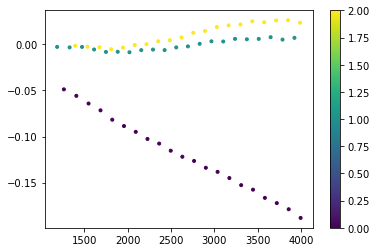

In [213]:
plt.scatter(mod_freqs[0], mod_freqs[0]-mod_freqs[1], marker='.', c=mod_ls[0])
plt.colorbar()

# whether add atmospheres

In [36]:
case = 'best_solar_eddin_gs98_ov'

modes = pd.read_excel(rootpath+'sample/modes.xlsx')
idx = (modes['KIC']==0) #& (modes['l']==0)
modes = modes.loc[idx]

idx = modes['l']==0
obs_freq = np.array(modes.loc[idx, 'fc'])
obs_efreq = np.ones(len(obs_freq))
obs_l = np.zeros(len(obs_freq))


s = se.sums(rootpath+'hpc/{:s}/best.profile.FGONG.sum'.format(case))
modes = pd.DataFrame(s.sums)

idx = modes['l']==0
mod_freq = np.array(modes.loc[idx, 'Refreq'])
mod_l, mod_inertia = np.array(modes.loc[idx, 'l']), np.array(modes.loc[idx, 'E_norm'])


s = se.sums(rootpath+'hpc/{:s}/best_atm.profile.FGONG.sum'.format(case))
modes = pd.DataFrame(s.sums)

idx = modes['l']==0
mod_freq_atm = np.array(modes.loc[idx, 'Refreq'])
mod_l_atm, mod_inertia_atm = np.array(modes.loc[idx, 'l']), np.array(modes.loc[idx, 'E_norm'])


mod_numax = 3100

Processing : /Volumes/Data/Onedrive/Work/numax-sc-metallicity/hpc/best_solar_eddin_gs98_ov/best.profile.FGONG.sum
Processing : /Volumes/Data/Onedrive/Work/numax-sc-metallicity/hpc/best_solar_eddin_gs98_ov/best_atm.profile.FGONG.sum


SC/muHz: -11.63
SC/muHz: -1.77


Text(0, 0.5, '(freq/numax)^3/inertia')

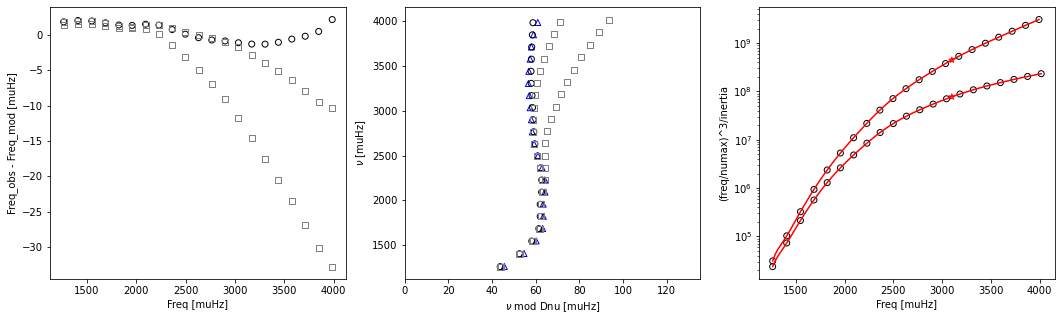

In [43]:
g = se.grid(None,[None],[None],'./',[None])
_,_,_,mod_freq,mod_l,mod_inertia=g.assign_n(obs_freq, obs_efreq, obs_l, mod_freq, mod_l, mod_inertia)
_,_,_,mod_freq_atm,mod_l_atm,mod_inertia_atm=g.assign_n(obs_freq, obs_efreq, obs_l, mod_freq_atm, mod_l_atm, mod_inertia_atm)
mod_freq_corr, surface_a3 = se.get_surface_correction(obs_freq, obs_l, 
                                                      mod_freq, mod_l, mod_inertia, mod_numax,
                                                      'cubic', True)
mod_freq_corr_atm, surface_a3_atm = se.get_surface_correction(obs_freq, obs_l, 
                                                      mod_freq_atm, mod_l_atm, mod_inertia_atm, mod_numax,
                                                      'cubic', True)
chi2_seis = np.nanmean((mod_freq_corr-obs_freq)**2.0)
chi2_seis_atm = np.nanmean((mod_freq_corr_atm-obs_freq)**2.0)

fig, axes = plt.subplots(figsize=[18,5], nrows=1, ncols=3, squeeze=False)

fi = scipy.interpolate.interp1d(mod_freq, (mod_freq/mod_numax)**3.0/mod_inertia, kind='cubic')
interp_x = np.linspace(mod_freq.min(), mod_freq.max(), 100)
interp_y = fi(interp_x)
mod_numax_div_inertia = fi(mod_numax)
print('SC/muHz: {:0.2f}'.format(mod_numax_div_inertia*surface_a3[0][0]))

fi = scipy.interpolate.interp1d(mod_freq_atm, (mod_freq_atm/mod_numax)**3.0/mod_inertia_atm, kind='cubic')
interp_x_atm = np.linspace(mod_freq_atm.min(), mod_freq_atm.max(), 100)
interp_y_atm = fi(interp_x_atm)
mod_numax_div_inertia_atm = fi(mod_numax)
print('SC/muHz: {:0.2f}'.format(mod_numax_div_inertia_atm*surface_a3_atm[0][0]))


Dnu, _ = se.get_obs_Dnu(obs_freq)
axes[0,1].scatter(obs_freq%Dnu, obs_freq, edgecolor='b', facecolor='none', marker='^',)
axes[0,1].scatter(mod_freq_corr%Dnu, mod_freq_corr, edgecolor='k', facecolor='none', marker='o',)
axes[0,1].scatter(mod_freq%Dnu, mod_freq, edgecolor='grey', facecolor='none', marker='s',)
axes[0,1].scatter(mod_freq_atm%Dnu, mod_freq_atm, edgecolor='grey', facecolor='none', marker='s',)



axes[0,1].set_xlabel('$\\nu$ mod Dnu [muHz]')
axes[0,1].set_ylabel('$\\nu$ [muHz]')
axes[0,1].set_xlim([0., Dnu])


axes[0,0].scatter(obs_freq,obs_freq-mod_freq_corr, edgecolor='k', facecolor='none', marker='o',)
axes[0,0].scatter(obs_freq,obs_freq-mod_freq, edgecolor='grey', facecolor='none', marker='s',)
axes[0,0].scatter(obs_freq,obs_freq-mod_freq_atm, edgecolor='grey', facecolor='none', marker='s',)
axes[0,0].set_xlabel('Freq [muHz]')
axes[0,0].set_ylabel('Freq_obs - Freq_mod [muHz]')

axes[0,2].scatter(mod_freq,(mod_freq/mod_numax)**3.0/mod_inertia, edgecolor='k', facecolor='none', marker='o',)
axes[0,2].scatter(mod_numax,mod_numax_div_inertia, edgecolor='red', facecolor='none', marker='*',)
axes[0,2].scatter(mod_freq_atm,(mod_freq_atm/mod_numax)**3.0/mod_inertia_atm, edgecolor='k', facecolor='none', marker='o',)
axes[0,2].scatter(mod_numax,mod_numax_div_inertia_atm, edgecolor='red', facecolor='none', marker='*',)
axes[0,2].plot(interp_x,interp_y, 'r-',)
axes[0,2].plot(interp_x_atm,interp_y_atm, 'r-',)
axes[0,2].set_yscale('log')
axes[0,2].set_xlabel('Freq [muHz]')
axes[0,2].set_ylabel('(freq/numax)^3/inertia')


# check whether atm has abrupt changes

Processing : /Volumes/Data/Onedrive/Work/numax-sc-metallicity/hpc/solar_a09/outputs/sample0061_best.fgong


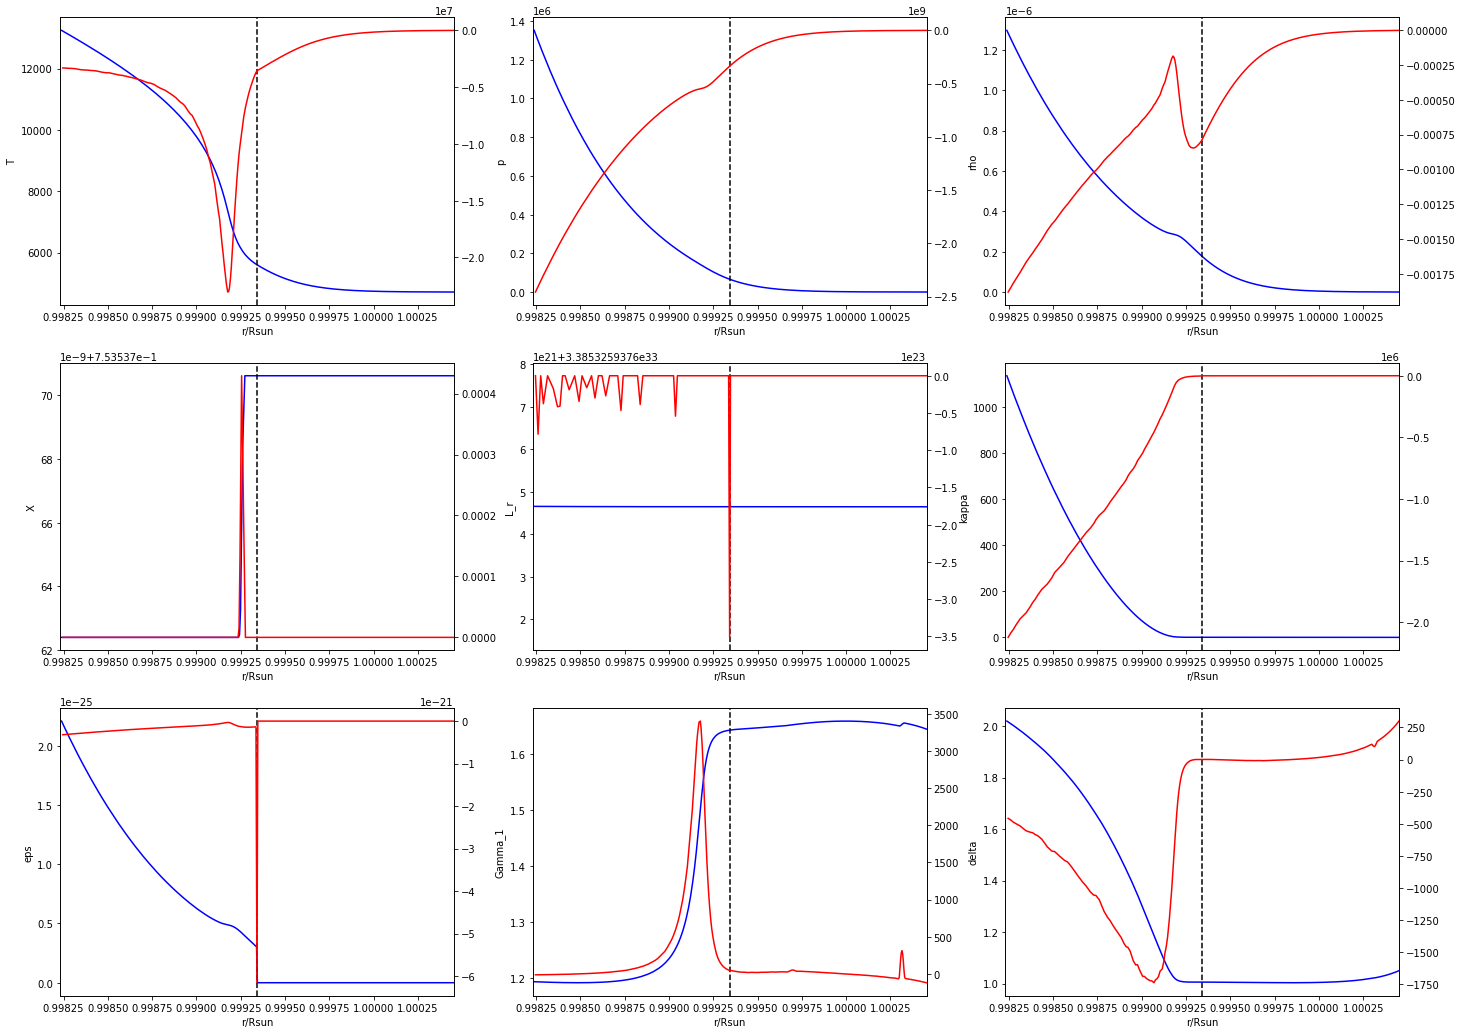

In [72]:
filepath = rootpath+'hpc/solar_a09/outputs/sample0061_best.fgong'

Rsun = 6.955*1e10


f = se.fgong(filepath)
mesh = f.mesh
R = f.header['R']/Rsun
variables = ['T', 'p', 'rho', 'X', 'L_r', 'kappa', 'eps', 'Gamma_1', 'delta']

fig, axes = plt.subplots(figsize=[24,18], nrows=3, ncols=3, squeeze=False)
axes = axes.reshape(-1)
for ivar, var in enumerate(variables):
    idx = (mesh['r']/Rsun)>(2*R-np.max(mesh['r']/Rsun)) #1.029
    x, y = (mesh['r'][idx]/Rsun), mesh[var][idx]
    Rsurf = np.max(x)
    axes[ivar].plot(x, y, 'b-')
    axes[ivar].axvline(R, linestyle='--', color='k')
    axes[ivar].set_xlim(2*R-Rsurf, Rsurf)
    axes[ivar].set_ylabel('{:s}'.format(var))
    axes[ivar].set_xlabel('r/Rsun')
    
    twin = axes[ivar].twinx()
    xp = (x[1:]+x[:-1])/2.
    yp = np.diff(y)/np.diff(x)
    twin.plot(xp, yp, 'r-')
    twin.set_xlim(2*R-Rsurf, Rsurf)
#     twin.set_ylabel('d {:s} / d r'.format(var))

# plt.savefig('model.png')

# Compare three test cases, figure out He burn & timestep

Use eddin1, i.e. default varctrl 1e-4 and mesh 1.0

eddin0: mesh 1.0 varctrl 1e-3, from Apr 26 00:00:05, to Apr 26 07:20:36

eddin1: mesh 1.0 varctrl 1e-4, from Apr 25 19:02:22, to Apr 26 03:45:02

eddin2: mesh 2.0 rgbtip varctrl 1e-4, from Apr 25 18:58:20, to Apr 26 06:16:42

In [62]:
# read in tracks and tracks useful cols
coarse_grid = pd.read_csv(rootpath+'hpc/eddin0/template/coarse_grid_input_params.txt')
eddin0, eddin1, eddin2 = [], [], []
cols = ['Teff', 'luminosity', 'star_mass', 'radius']
for ie, eddin in enumerate([eddin0, eddin1, eddin2]):
    for it, track in coarse_grid.loc[:,:].iterrows():
        eddin.append({})
        h=h5py.File(rootpath+'hpc/eddin{:0.0f}/complete_grid/index{:06.0f}.history.h5'.format(ie,track['index']), 'r')

        m_maxlum = h['model_number'][np.argmax(h['log_L'][:])]
        idx_He = ((h['model_number'][:]> m_maxlum) & (h['center_he4'][:]<0.95) &(h['center_he4'][:]>0.02) )
        idx = (10.0**(h['log_Lnuc'][:]-h['log_L'][:])>=0.99) & (h['model_number'][:] < m_maxlum) #& (np.isfinite(d['profile_number']))

#         colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']
#         for iphase, phase in enumerate([7]):
#             if ic==0:
#                 idx = (idx_He) & (d['phase_of_evolution'] == phase)
#             else:
#                 idx = (idx_He) & (d['phase_of_evolution'] == phase) & (np.isfinite(d['profile_number']))

        idx = (h['flag_seismo'][:] ==1) & ( idx | idx_He)
    
        for col in cols:
            eddin[it][col] = h[col][:][idx]
        eddin[it]['Dnu_scaling'] = h['delta_nu_scaling'][:][idx]
        eddin[it]['numax_scaling'] = h['numax_scaling'][:][idx]
        eddin[it]['DPi'] = h['delta_Pg'][:][idx]
        Dnu_freq = np.zeros(np.sum(idx))
        for ip, profile_number in enumerate(h['profile_number'][idx]):
            Dnu_freq[ip] = se.get_model_Dnu(h['profile{:0.0f}/freq'.format(profile_number)],
                             h['profile{:0.0f}/l'.format(profile_number)],
                             eddin[it]['Dnu_scaling'][ip],
                             eddin[it]['numax_scaling'][ip])
        eddin[it]['Dnu_freq'] = Dnu_freq

In [56]:
eddin0[0].keys()

dict_keys(['Teff', 'luminosity', 'star_mass', 'radius', 'Dnu_scaling', 'numax_scaling', 'DPi', 'Dnu_freq'])

### eddin 1 vs eddin 0

Text(0, 0.5, 'Dnu_freq/Dnu_scaling')

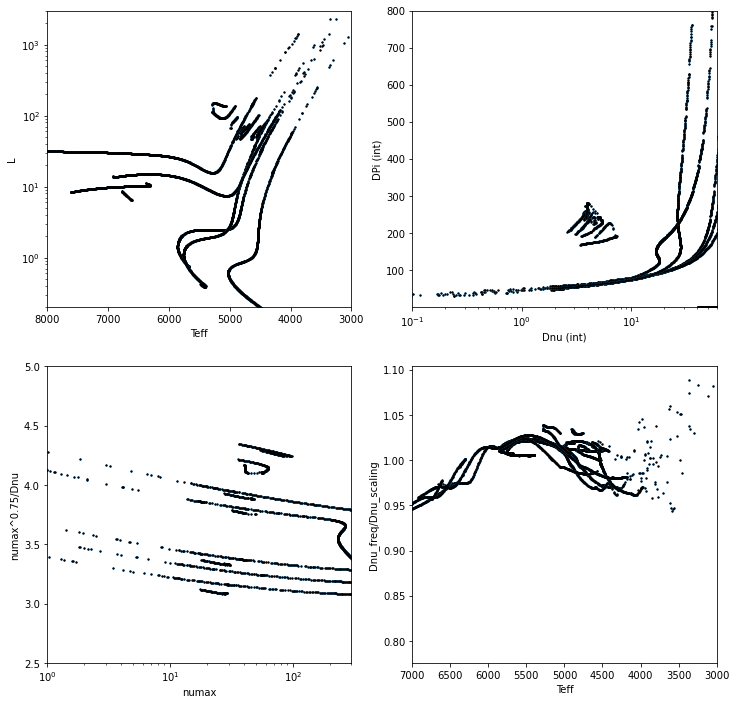

In [63]:
fig, axes = plt.subplots(figsize=[12,12], nrows=2, ncols=2, squeeze=False)
axes = axes.reshape(-1)

for it in range(0,7):
    style = {'c':'C0','marker':'.', 's':7}
    axes[0].scatter(eddin1[it]['Teff'], eddin1[it]['luminosity'],  **style)
    axes[1].scatter(eddin1[it]['Dnu_scaling'], eddin1[it]['DPi'], **style)
    axes[2].scatter(eddin1[it]['numax_scaling'], eddin1[it][ 'numax_scaling']**0.75/eddin1[it]['Dnu_scaling'], **style)
    axes[3].scatter(eddin1[it][ 'Teff'], eddin1[it][ 'Dnu_freq']/eddin1[it]['Dnu_scaling'], **style)
    
    style = {'c':'k','marker':'.', 's':5}
    axes[0].scatter(eddin0[it]['Teff'], eddin0[it]['luminosity'],  **style)
    axes[1].scatter(eddin0[it]['Dnu_scaling'], eddin0[it]['DPi'], **style)
    axes[2].scatter(eddin0[it]['numax_scaling'], eddin0[it][ 'numax_scaling']**0.75/eddin0[it][ 'Dnu_scaling'], **style)
    axes[3].scatter(eddin0[it][ 'Teff'], eddin0[it][ 'Dnu_freq']/eddin0[it]['Dnu_scaling'], **style)
    
axes[0].axis([8000,3000,0.2,3000.])
axes[0].set_yscale('log')
axes[0].set_xlabel('Teff')
axes[0].set_ylabel('L')

axes[1].axis([0.1, 60, 0.1, 800.])
axes[1].set_xscale('log')
axes[1].set_xlabel('Dnu (int)')
axes[1].set_ylabel('DPi (int)')

axes[2].axis([1, 300, 2.5, 5.0])
axes[2].set_xscale('log')
axes[2].set_xlabel('numax')
axes[2].set_ylabel('numax^0.75/Dnu')

axes[3].set_xlim(7000, 3000)#0.9, 1.1])
axes[3].set_xlabel('Teff')
axes[3].set_ylabel('Dnu_freq/Dnu_scaling')

### eddin1 vs eddin2

Text(0, 0.5, 'Dnu_freq/Dnu_scaling')

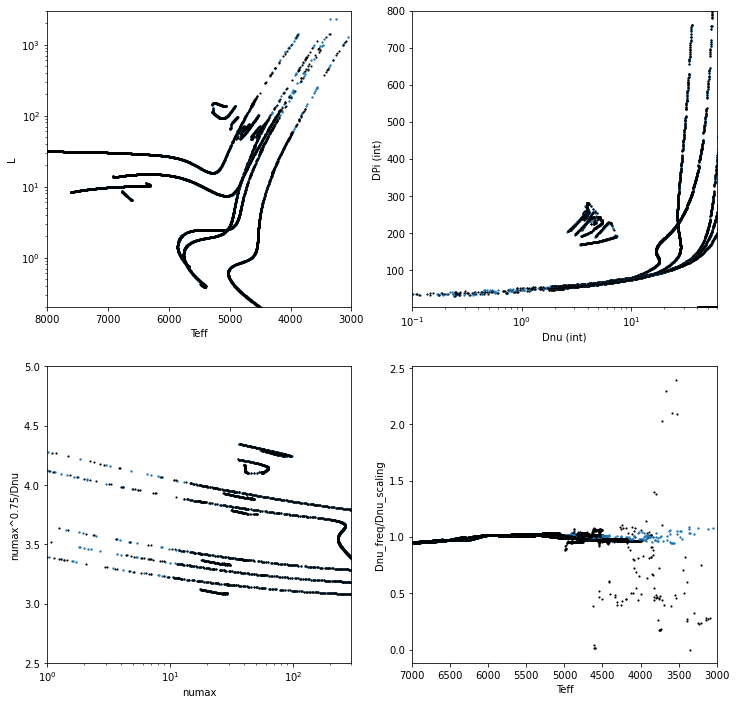

In [64]:
fig, axes = plt.subplots(figsize=[12,12], nrows=2, ncols=2, squeeze=False)
axes = axes.reshape(-1)

for it in range(0,7):
    style = {'c':'C0','marker':'.', 's':7}
    axes[0].scatter(eddin1[it]['Teff'], eddin1[it]['luminosity'],  **style)
    axes[1].scatter(eddin1[it]['Dnu_scaling'], eddin1[it]['DPi'], **style)
    axes[2].scatter(eddin1[it]['numax_scaling'], eddin1[it][ 'numax_scaling']**0.75/eddin1[it]['Dnu_scaling'], **style)
    axes[3].scatter(eddin1[it][ 'Teff'], eddin1[it][ 'Dnu_freq']/eddin1[it]['Dnu_scaling'], **style)
    
    style = {'c':'k','marker':'.', 's':5}
    axes[0].scatter(eddin2[it]['Teff'], eddin2[it]['luminosity'],  **style)
    axes[1].scatter(eddin2[it]['Dnu_scaling'], eddin2[it]['DPi'], **style)
    axes[2].scatter(eddin2[it]['numax_scaling'], eddin2[it][ 'numax_scaling']**0.75/eddin2[it][ 'Dnu_scaling'], **style)
    axes[3].scatter(eddin2[it]['Teff'], eddin2[it][ 'Dnu_freq']/eddin2[it]['Dnu_scaling'], **style)
    
axes[0].axis([8000,3000,0.2,3000.])
axes[0].set_yscale('log')
axes[0].set_xlabel('Teff')
axes[0].set_ylabel('L')

axes[1].axis([0.1, 60, 0.1, 800.])
axes[1].set_xscale('log')
axes[1].set_xlabel('Dnu (int)')
axes[1].set_ylabel('DPi (int)')

axes[2].axis([1, 300, 2.5, 5.0])
axes[2].set_xscale('log')
axes[2].set_xlabel('numax')
axes[2].set_ylabel('numax^0.75/Dnu')

axes[3].set_xlim(7000, 3000)#0.9, 1.1])
axes[3].set_xlabel('Teff')
axes[3].set_ylabel('Dnu_freq/Dnu_scaling')